### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('twitter.data',header = None)

In [3]:
new_col = ["NCD","AI","AS(NA)","BL","NAC","AS(NAC)","CS","AT","NA","ADL","NAD"]
for i in range(len(data.columns)):
    if i < 7:
        data=data.rename(columns = {i:new_col[0] + '_'+ str(i)})
    elif i >= 7 and i < 14:
        data=data.rename(columns = {i:new_col[1] + '_'+ str(i-7)})
    elif i >= 14 and i < 21:
        data=data.rename(columns = {i:new_col[2] + '_'+ str(i-14)})
    elif i >= 21 and i < 28:
        data=data.rename(columns = {i:new_col[3] + '_'+ str(i-21)})
    elif i >= 28 and i < 35:
        data=data.rename(columns = {i:new_col[4] + '_'+ str(i-28)})
    elif i >= 35 and i < 42:
        data=data.rename(columns = {i:new_col[5] + '_'+ str(i-35)})
    elif i >= 42 and i < 49:
        data=data.rename(columns = {i:new_col[6] + '_'+ str(i-42)})
    elif i >= 49 and i < 56:
        data=data.rename(columns = {i:new_col[7] + '_'+ str(i-49)})
    elif i >= 56 and i < 63:
        data=data.rename(columns = {i:new_col[8] + '_'+ str(i-56)})
    elif i >= 63 and i < 70:
        data=data.rename(columns = {i:new_col[9] + '_'+ str(i-63)})
    elif i >= 70 and i < 77:
        data=data.rename(columns = {i:new_col[10] + '_'+ str(i-70)})
    else:
        data = data.rename(columns= {i:'Target'})

In [4]:
data[['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6']].tail()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6
583245,1289,1228,1343,1999,1789,1643,1626
583246,1228,1343,1999,1789,1643,1626,2582
583247,1343,1999,1789,1643,1626,2582,1649
583248,1689,1468,0,1721,1699,1565,1688
583249,1468,0,1721,1699,1565,1688,1453


In [6]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


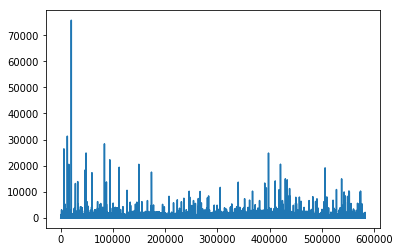

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Target'].plot()

In [11]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [9]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [12]:
X= data.drop(['Target'], axis =1)

In [13]:
y = data['Target']

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [16]:
X_test

array([[0.00000000e+00, 1.35253939e-04, 5.33262232e-05, ...,
        0.00000000e+00, 1.77029197e-04, 3.79348280e-05],
       [4.95662949e-04, 4.73388787e-04, 3.19957339e-04, ...,
        4.67862878e-04, 4.55217936e-04, 5.43732534e-04],
       [4.58488228e-03, 4.15905863e-03, 4.58605519e-03, ...,
        2.54163347e-03, 3.94522211e-03, 1.64384255e-03],
       ...,
       [2.06526229e-04, 3.38134848e-04, 1.59978670e-04, ...,
        1.13804484e-04, 1.26449427e-04, 2.27608968e-04],
       [4.13052458e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.26449427e-05, 0.00000000e+00, 1.26449427e-05],
       [1.65220983e-04, 6.76269696e-05, 1.06652446e-04, ...,
        3.79348280e-05, 2.52898853e-05, 1.77029197e-04]])

In [17]:
y_test

81333       21.5
366913      37.0
571146     119.0
189634      32.5
490742      38.0
363902      92.0
448046     755.0
554377       3.0
31505        4.5
317171       4.5
499158     237.0
10177        3.0
177281      12.0
46573       77.0
120522       0.0
200428       1.0
556061    4727.0
272726      25.5
401782      69.5
373114       8.0
343674      22.0
410494       5.0
244125      27.0
401835      85.0
468899      29.0
333393     104.5
579780      14.0
73836       60.5
431429     129.5
355287    1404.5
           ...  
328315     147.5
523054       5.0
238790       1.5
554500       7.5
478561      13.5
290728       0.0
466034       7.5
213994       4.5
516569     201.0
438976      92.5
509391       0.5
563204      23.5
343910      24.0
569094     137.5
536589      23.0
403073       2.0
184747      21.0
209804    1077.5
223142    1707.0
21406       54.5
544223      98.5
535940      13.0
445957       4.0
207009      23.5
56510        7.5
288349       6.0
11020      248.5
539945       8

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lreg = LinearRegression()

In [20]:
lreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(lreg.score(X_train, y_train))

0.9327419369182747


In [22]:
print(lreg.score(X_test, y_test))

0.9479748733882266


In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
scores = cross_val_score(lreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.91373466 0.93822269 0.93069946 0.94449191 0.9486504 ]


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

# Polynomial

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

print(train_score_list)
print(test_score_list)

%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

# Ridge

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
print(train_score_list)
print(test_score_list)

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

In [ ]:
ridge.coef_

In [ ]:
ridge.intercept_

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# lasso

In [ ]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [ ]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# SVR

In [37]:
from sklearn.svm import LinearSVR

linear_svm = LinearSVR().fit(X_train, y_train)


In [38]:
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (77,)
Intercept shape:  (1,)


In [39]:
y_predict = linear_svm.predict(X_test)

In [33]:
X_train

array([[1.23915737e-02, 1.88679245e-02, 5.54592721e-03, ...,
        9.57222159e-03, 9.85041033e-03, 1.18609562e-02],
       [2.27178852e-03, 4.19287212e-03, 2.79962672e-03, ...,
        1.42887852e-03, 1.54268300e-03, 2.31402451e-03],
       [2.47831475e-04, 2.36694394e-04, 5.33262232e-05, ...,
        1.26449427e-05, 1.51739312e-04, 1.26449427e-04],
       ...,
       [6.19578686e-04, 3.38134848e-04, 5.59925343e-04, ...,
        6.19602190e-04, 1.01159541e-04, 1.26449427e-04],
       [7.84799670e-04, 5.41015757e-04, 4.26609785e-04, ...,
        4.04638165e-04, 2.65543796e-04, 3.54058394e-04],
       [8.26104915e-05, 6.76269696e-05, 7.99893348e-05, ...,
        6.32247133e-05, 2.52898853e-05, 3.79348280e-05]])

In [ ]:
from sklearn.svm import SVR
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVR(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVR(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 328077   size of validation set: 109360   size of test set: 145813

